In [338]:
import numpy as np

In [1]:
import pandas as pd

In [2]:
import feather

In [160]:
%%time
msf = pd.read_csv(r'D:\03lecture\02bigData\final_project\final_project\msf.csv')

Wall time: 4min 50s


In [161]:
from fuzzywuzzy import process

In [162]:
import datetime

In [410]:
import statsmodels.api as sm

In [124]:
msf = msf.query('SHRCD in([10,11])')

In [163]:
comp= list(set(msf.COMNAM))

In [164]:
msf.COMNAM

0                                 NaN
1           OPTIMUM MANUFACTURING INC
2           OPTIMUM MANUFACTURING INC
3           OPTIMUM MANUFACTURING INC
4           OPTIMUM MANUFACTURING INC
5           OPTIMUM MANUFACTURING INC
6           OPTIMUM MANUFACTURING INC
7           OPTIMUM MANUFACTURING INC
8           OPTIMUM MANUFACTURING INC
9           OPTIMUM MANUFACTURING INC
10          OPTIMUM MANUFACTURING INC
11          OPTIMUM MANUFACTURING INC
12          OPTIMUM MANUFACTURING INC
13          OPTIMUM MANUFACTURING INC
14          OPTIMUM MANUFACTURING INC
15          OPTIMUM MANUFACTURING INC
16          OPTIMUM MANUFACTURING INC
17          OPTIMUM MANUFACTURING INC
18          OPTIMUM MANUFACTURING INC
19          OPTIMUM MANUFACTURING INC
20          OPTIMUM MANUFACTURING INC
21          OPTIMUM MANUFACTURING INC
22          OPTIMUM MANUFACTURING INC
23          OPTIMUM MANUFACTURING INC
24          OPTIMUM MANUFACTURING INC
25          OPTIMUM MANUFACTURING INC
26          

In [165]:
%%time
process.extract('Deutsche',comp,limit = 3)

Wall time: 13.7 s


[('DEUTSCHE HIGH INCOME OPP FD INC', 90),
 ('DEUTSCHE HIGH INCOME TRUST', 90),
 ('DEUTSCHE BANK A G', 90)]

In [166]:
civil_info = pd.read_csv(r'D:\03lecture\02bigData\final_project\final_project\civil_info.csv')

In [167]:
civil_info.dropna(inplace = True)

In [168]:
civil_info

,company_name,civil_event,release_date,resolution_date,Monetary/Fine
0,GOLDMAN SACHS & CO.LLC,civil_event,2010/4/16,2010/7/20,"535,000,000.00"
1,GOLDMAN SACHS & CO.LLC,civil_event,2005/1/25,2005/1/25,"40,000,000.00"
2,GOLDMAN SACHS & CO.LLC,civil_event,2003/4/28,2003/10/31,"25,000,000.00"
3,CREDIT SUISSE SECURITIES (USA) LLC,civil_event,2012/11/20,2018/12/31,"10,000,000"
4,CREDIT SUISSE SECURITIES (USA) LLC,civil_event,2013/7/16,2015/9/4,"211,863,998.56"
5,CREDIT SUISSE SECURITIES (USA) LLC,civil_event,2003/4/28,2003/10/31,"200,000,000.00"
6,CITIGROUP GLOBAL MARKETS INC.,civil_event,2011/10/19,2014/8/5,"95,000,000.00"
8,CITIGROUP GLOBAL MARKETS INC.,civil_event,2003/4/28,2003/10/31,"150,000,000.00"
9,CITIGROUP GLOBAL MARKETS INC.,civil_event,1996/12/1,1999/5/11,"1,333,333"
10,"WELLS FARGO SECURITIES, LLC",civil_event,2016/3/7,2019/3/20,"812,500.00"


In [169]:
sample = list(set(civil_info.company_name))

In [170]:
sample

['CITIGROUP GLOBAL MARKETS INC.',
 'DEUTSCHE',
 'CREDIT SUISSE SECURITIES (USA) LLC',
 'GOLDMAN SACHS & CO.LLC',
 'WELLS FARGO SECURITIES, LLC']

In [171]:
sample_citi = process.extract('citigroup',comp,limit = 3)
sample_citi2 = [item[0] for item in sample_citi[:2]]
df_citi = pd.DataFrame({'company_name':'CITIGROUP GLOBAL MARKETS INC.','COMNAM':sample_citi2})
sample_GS = process.extract('GOLDMAN SACHS',comp,limit = 5)
sample_GS2 = [item[0] for item in sample_GS]
df_GS = pd.DataFrame({'company_name':'GOLDMAN SACHS & CO.LLC','COMNAM':sample_GS2})
sample_WF = process.extract('WELLS FARGO', comp, limit = 2)
sample_WF2 = [item[0] for item in sample_WF]
df_WF2 = pd.DataFrame({'COMNAM':sample_WF2})
df_WF2['company_name'] = 'WELLS FARGO SECURITIES, LLC'
sample_DE = process.extract('DEUTSCHE', comp, limit = 3)
sample_DE2 = [item[0] for item in sample_DE]
df_DE = pd.DataFrame({'COMNAM':sample_DE2})
df_DE['company_name'] = 'DEUTSCHE'
sample_CRE = process.extract('CREDIT SUISSE',comp,limit = 3)
sample_CRE2 = [item[0] for item in sample_CRE]
df_CRE = pd.DataFrame({'COMNAM':sample_CRE2})
df_CRE['company_name'] = 'CREDIT SUISSE SECURITIES (USA) LLC'
COMP_link = pd.concat([df_citi,df_GS,df_WF2,df_DE,df_CRE],sort = True).reset_index()

In [201]:
COMP_link.pop('index')

0     0
1     1
2     0
3     1
4     2
5     3
6     4
7     0
8     1
9     0
10    1
11    2
12    0
13    1
14    2
Name: index, dtype: int64

In [414]:
COMP_link.head()

,COMNAM,company_name
0,CITIGROUP INC,CITIGROUP GLOBAL MARKETS INC.
1,CITIGROUP INVESTS CORP LOAN FD,CITIGROUP GLOBAL MARKETS INC.
2,GOLDMAN SACHS MLP INC OPPS FD,GOLDMAN SACHS & CO.LLC
3,GOLDMAN SACHS B D C INC,GOLDMAN SACHS & CO.LLC
4,GOLDMAN SACHS E T F TRUST,GOLDMAN SACHS & CO.LLC


In [203]:
civil_info_comp = pd.merge(civil_info,COMP_link,on= 'company_name',how = 'outer')

In [204]:
civil_info_comp['short_time'] = pd.to_datetime(civil_info_comp.release_date) +  datetime.timedelta(days = 1)

In [205]:
civil_info_comp['close_time'] = civil_info_comp.short_time + datetime.timedelta(days = 7)

In [206]:
civil_info_comp['position'] = 'short'

In [159]:
civil_info_comp

,company_name,civil_event,release_date,resolution_date,Monetary/Fine,COMNAM,short_time,close_time,position
0,GOLDMAN SACHS & CO.LLC,civil_event,2010-04-16,2010/7/20,"535,000,000.00",GOLDMAN SACHS MLP INC OPPS FD,2010-04-17,2010-04-24,short
1,GOLDMAN SACHS & CO.LLC,civil_event,2010-04-16,2010/7/20,"535,000,000.00",GOLDMAN SACHS B D C INC,2010-04-17,2010-04-24,short
2,GOLDMAN SACHS & CO.LLC,civil_event,2010-04-16,2010/7/20,"535,000,000.00",GOLDMAN SACHS E T F TRUST,2010-04-17,2010-04-24,short
3,GOLDMAN SACHS & CO.LLC,civil_event,2010-04-16,2010/7/20,"535,000,000.00",GOLDMAN SACHS MLP & ENERGY REN F,2010-04-17,2010-04-24,short
4,GOLDMAN SACHS & CO.LLC,civil_event,2010-04-16,2010/7/20,"535,000,000.00",GOLDMAN SACHS GROUP INC,2010-04-17,2010-04-24,short
5,GOLDMAN SACHS & CO.LLC,civil_event,2005-01-25,2005/1/25,"40,000,000.00",GOLDMAN SACHS MLP INC OPPS FD,2005-01-26,2005-02-02,short
6,GOLDMAN SACHS & CO.LLC,civil_event,2005-01-25,2005/1/25,"40,000,000.00",GOLDMAN SACHS B D C INC,2005-01-26,2005-02-02,short
7,GOLDMAN SACHS & CO.LLC,civil_event,2005-01-25,2005/1/25,"40,000,000.00",GOLDMAN SACHS E T F TRUST,2005-01-26,2005-02-02,short
8,GOLDMAN SACHS & CO.LLC,civil_event,2005-01-25,2005/1/25,"40,000,000.00",GOLDMAN SACHS MLP & ENERGY REN F,2005-01-26,2005-02-02,short
9,GOLDMAN SACHS & CO.LLC,civil_event,2005-01-25,2005/1/25,"40,000,000.00",GOLDMAN SACHS GROUP INC,2005-01-26,2005-02-02,short


In [327]:
msf2 = msf.query('COMNAM in(@civil_info_comp.COMNAM)&RET not in(["C","B"])')
msf2.reset_index(inplace = True)
msf2.pop('index')
msf2['date'] = msf2.date.astype('str') 
msf2['date'] = pd.to_datetime(msf2.date)

In [207]:
civil_info_comp['release_date'] = pd.to_datetime(civil_info_comp.release_date)

In [132]:
msf.query('COMNAM == "WELLS MANAGEMENT CORP"')

,PERMNO,date,SHRCD,EXCHCD,COMNAM,PRC,VOL,RET,RETX
73478740,81964,19721214,10.0,3.0,WELLS MANAGEMENT CORP,-3.0625,NaN,C,C
73478741,81964,19721215,10.0,3.0,WELLS MANAGEMENT CORP,-3.0625,NaN,0.000000,0.000000
73478742,81964,19721218,10.0,3.0,WELLS MANAGEMENT CORP,-3.0625,NaN,0.000000,0.000000
73478743,81964,19721219,10.0,3.0,WELLS MANAGEMENT CORP,-3.0625,NaN,0.000000,0.000000
73478744,81964,19721220,10.0,3.0,WELLS MANAGEMENT CORP,-3.0625,NaN,0.000000,0.000000
73478745,81964,19721221,10.0,3.0,WELLS MANAGEMENT CORP,-3.0625,NaN,0.000000,0.000000
73478746,81964,19721222,10.0,3.0,WELLS MANAGEMENT CORP,-2.9375,NaN,-0.040816,-0.040816
73478747,81964,19721226,10.0,3.0,WELLS MANAGEMENT CORP,-2.9375,NaN,0.000000,0.000000
73478748,81964,19721227,10.0,3.0,WELLS MANAGEMENT CORP,-2.8125,NaN,-0.042553,-0.042553
73478749,81964,19721229,10.0,3.0,WELLS MANAGEMENT CORP,-2.6875,NaN,-0.044444,-0.044444


In [334]:
short_portfolio = pd.merge(msf2[['COMNAM','date','RET']],civil_info_comp,left_on = ['COMNAM','date'],right_on = ['COMNAM','short_time'],how = 'right').dropna()

In [335]:
short_portfolio

,COMNAM,date,RET,company_name,civil_event,release_date,resolution_date,Monetary/Fine,short_time,close_time,position
0,CITIGROUP INC,2003-04-29,-0.004075,CITIGROUP GLOBAL MARKETS INC.,civil_event,2003-04-28,2003/10/31,"150,000,000.00",2003-04-29,2003-05-06,short
1,CITIGROUP INC,2011-10-20,0.023477,CITIGROUP GLOBAL MARKETS INC.,civil_event,2011-10-19,2014/8/5,"95,000,000.00",2011-10-20,2011-10-27,short
2,CREDIT SUISSE ASSET MGMT INC FD,2003-04-29,-0.004329,CREDIT SUISSE SECURITIES (USA) LLC,civil_event,2003-04-28,2003/10/31,"200,000,000.00",2003-04-29,2003-05-06,short
3,CREDIT SUISSE ASSET MGMT INC FD,2012-11-21,0.005249,CREDIT SUISSE SECURITIES (USA) LLC,civil_event,2012-11-20,2018/12/31,"10,000,000",2012-11-21,2012-11-28,short
4,CREDIT SUISSE ASSET MGMT INC FD,2013-07-17,0.008021,CREDIT SUISSE SECURITIES (USA) LLC,civil_event,2013-07-16,2015/9/4,"211,863,998.56",2013-07-17,2013-07-24,short
5,CREDIT SUISSE HIGH YIELD BOND FD,2003-04-29,-0.006211,CREDIT SUISSE SECURITIES (USA) LLC,civil_event,2003-04-28,2003/10/31,"200,000,000.00",2003-04-29,2003-05-06,short
6,CREDIT SUISSE HIGH YIELD BOND FD,2012-11-21,0.003135,CREDIT SUISSE SECURITIES (USA) LLC,civil_event,2012-11-20,2018/12/31,"10,000,000",2012-11-21,2012-11-28,short
7,CREDIT SUISSE HIGH YIELD BOND FD,2013-07-17,0.019934,CREDIT SUISSE SECURITIES (USA) LLC,civil_event,2013-07-16,2015/9/4,"211,863,998.56",2013-07-17,2013-07-24,short
8,CITIGROUP INVESTS CORP LOAN FD,2003-04-29,0.003113,CITIGROUP GLOBAL MARKETS INC.,civil_event,2003-04-28,2003/10/31,"150,000,000.00",2003-04-29,2003-05-06,short
9,GOLDMAN SACHS GROUP INC,2003-04-29,-0.000784,GOLDMAN SACHS & CO.LLC,civil_event,2003-04-28,2003/10/31,"25,000,000.00",2003-04-29,2003-05-06,short


In [336]:
portfolio = pd.merge(msf2,short_portfolio,on = ['COMNAM','date','RET'],how = 'left')

In [337]:
portfolio['position'] = portfolio.position.fillna('long')

In [394]:
portfolio2 = portfolio.query('month_date >= "1997-12-31"')

In [342]:
portfolio['RET'] = portfolio.RET.astype('float')

In [343]:
portfolio['RET'] = np.where(portfolio['position'] == 'long',portfolio.RET*1,portfolio.RET*-1)

In [344]:
def end_of_month(any_day):
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)  # this will never fail
    return next_month - datetime.timedelta(days=next_month.day)

In [345]:
portfolio['month_date'] = portfolio['date'].apply(lambda x: end_of_month(x))

In [395]:
portfolio2

,PERMNO,date,SHRCD,EXCHCD,COMNAM,PRC,VOL,RET,RETX,company_name,civil_event,release_date,resolution_date,Monetary/Fine,short_time,close_time,position,month_date
0,14287,2013-11-27,44.0,1.0,GOLDMAN SACHS MLP INC OPPS FD,20.0000,311300.0,0.000000,0.000000,NaN,NaN,NaT,NaN,NaN,NaT,NaT,long,2013-11-30
1,14287,2013-11-29,44.0,1.0,GOLDMAN SACHS MLP INC OPPS FD,20.0000,116300.0,0.000000,0.000000,NaN,NaN,NaT,NaN,NaN,NaT,NaT,long,2013-11-30
2,14287,2013-12-02,44.0,1.0,GOLDMAN SACHS MLP INC OPPS FD,20.0000,193600.0,0.000000,0.000000,NaN,NaN,NaT,NaN,NaN,NaT,NaT,long,2013-12-31
3,14287,2013-12-03,44.0,1.0,GOLDMAN SACHS MLP INC OPPS FD,20.0100,132900.0,0.000500,0.000500,NaN,NaN,NaT,NaN,NaN,NaT,NaT,long,2013-12-31
4,14287,2013-12-04,44.0,1.0,GOLDMAN SACHS MLP INC OPPS FD,20.0000,86400.0,-0.000500,-0.000500,NaN,NaN,NaT,NaN,NaN,NaT,NaT,long,2013-12-31
5,14287,2013-12-05,44.0,1.0,GOLDMAN SACHS MLP INC OPPS FD,20.2900,236900.0,0.014500,0.014500,NaN,NaN,NaT,NaN,NaN,NaT,NaT,long,2013-12-31
6,14287,2013-12-06,44.0,1.0,GOLDMAN SACHS MLP INC OPPS FD,20.3400,103000.0,0.002464,0.002464,NaN,NaN,NaT,NaN,NaN,NaT,NaT,long,2013-12-31
7,14287,2013-12-09,44.0,1.0,GOLDMAN SACHS MLP INC OPPS FD,20.2110,76400.0,-0.006342,-0.006342,NaN,NaN,NaT,NaN,NaN,NaT,NaT,long,2013-12-31
8,14287,2013-12-10,44.0,1.0,GOLDMAN SACHS MLP INC OPPS FD,20.0000,112800.0,-0.010440,-0.010440,NaN,NaN,NaT,NaN,NaN,NaT,NaT,long,2013-12-31
9,14287,2013-12-11,44.0,1.0,GOLDMAN SACHS MLP INC OPPS FD,20.1300,170500.0,0.006500,0.006500,NaN,NaN,NaT,NaN,NaN,NaT,NaT,long,2013-12-31


In [396]:
port_ret = pd.DataFrame(portfolio2.groupby('month_date')['RET'].mean())

In [397]:
port_ret['cumulative_ret'] = np.cumprod(1+port_ret['RET'])

In [372]:
port_ret.head()

,RET,cumulative_ret
month_date,,
1998-10-31,0.024399,1.024399
1998-11-30,0.003864,1.028357
1998-12-31,-0.000207,1.028144
1999-01-31,0.007102,1.035446
1999-02-28,0.002785,1.038330


In [398]:
import matplotlib.pyplot as plt

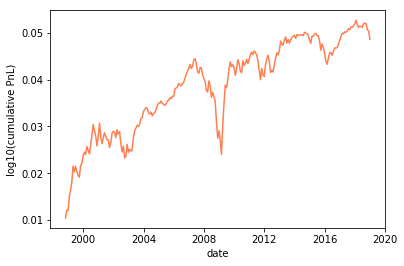

In [399]:
plt.figure()
plt.plot(pd.to_datetime(port_ret.index), np.log10(port_ret['cumulative_ret']), color='coral')
plt.ylabel("log10(cumulative PnL)")
plt.xlabel("date")
plt.show()

In [373]:
import feather

In [403]:
ff = feather.read_dataframe(r'D:\03lecture\02bigData\final_project\final_project\ff_four_factor.feather')

In [404]:
ff.columns = ['dt','mkt_rf','smb','hml','rf','mom']
ff.dt = pd.to_datetime(ff.dt)
monthly_ff = ff.copy()
keys = list(monthly_ff.keys())
keys.remove('dt')
monthly_ff[keys] = 1 + monthly_ff[keys]
monthly_ff = monthly_ff.groupby(pd.Grouper(key='dt',freq='M')).prod()
monthly_ff[keys] = monthly_ff[keys] -1
monthly_ff.rename({'dt': 'end_of_month'}, inplace=True)

In [407]:
monthly_ff2 = monthly_ff.query('dt>= "1997-12-31"')

In [408]:
benchmark = pd.merge(port_ret, monthly_ff, left_index = True, right_index = True)

In [412]:
benchmark.head()

,RET,cumulative_ret,mkt_rf,smb,hml,rf,mom
1998-10-31,0.024399,1.024399,0.070862,-0.029069,-0.025027,0.003305,-0.062753
1998-11-30,0.003864,1.028357,0.060437,0.009210,-0.028987,0.003004,0.028994
1998-12-31,-0.000207,1.028144,0.061089,-0.003493,-0.042830,0.003747,0.097507
1999-01-31,0.007102,1.035446,0.034758,0.002552,-0.039247,0.003616,0.017706
1999-02-28,0.002785,1.038330,-0.040794,-0.058522,0.013580,0.003616,-0.000506


In [413]:
y = benchmark['RET']
x = benchmark[['mkt_rf', 'hml', 'smb']]
model = sm.OLS(y, sm.add_constant(x)).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     115.3
Date:                Sat, 18 May 2019   Prob (F-statistic):           4.03e-46
Time:                        11:49:19   Log-Likelihood:                 1138.7
No. Observations:                 242   AIC:                            -2269.
Df Residuals:                     238   BIC:                            -2255.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.936      0.3